<a href="https://colab.research.google.com/github/SachinScaler/May25_Intro_to_ML_NN/blob/main/ML_Linear_Regression_4%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/cars24-car-price.csv'
df = pd.read_csv(url)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [3]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# non numerical categorical variable handling
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

# scaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.604e+04
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        15:23:57   Log-Likelihood:                 23464.
No. Observations:               15856   AIC:                        -4.689e+04
Df Residuals:                   15838   BIC:                        -4.675e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3050      0.000    696.689      0.0

In [8]:
df.corr()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
selling_price,1.000000,0.390667,-0.100739,-0.314927,0.652296,0.770390,-0.390667,0.749553,0.968059,-0.201808,-0.019547,0.335236,0.019073,-0.053388,-0.313570,-0.582019,-0.234645,0.223282
year,0.390667,1.000000,-0.310288,0.262772,-0.054552,0.074124,-1.000000,-0.007605,0.332411,-0.017124,0.063389,0.026316,0.004328,-0.072595,-0.025883,-0.108357,-0.002936,0.023967
km_driven,-0.100739,-0.310288,1.000000,-0.090059,0.169491,0.007457,0.310288,0.024116,-0.069615,0.091550,-0.049455,0.249679,-0.002327,0.014153,-0.249359,0.084569,-0.136180,0.151401
mileage,-0.314927,0.262772,-0.090059,1.000000,-0.586985,-0.473775,-0.262772,-0.397677,-0.331557,0.069013,0.027321,0.108808,0.228299,-0.023325,-0.159073,0.263190,0.371743,-0.379429
engine,0.652296,-0.054552,0.169491,-0.586985,1.000000,0.791340,0.054552,0.631664,0.673462,-0.113243,-0.051005,0.453970,-0.001711,-0.049141,-0.425312,-0.368639,-0.517424,0.515238
max_power,0.770390,0.074124,0.007457,-0.473775,0.791340,1.000000,-0.074124,0.719000,0.794316,-0.195152,-0.031343,0.261586,-0.002934,-0.052945,-0.231222,-0.543705,-0.225431,0.194063
age,-0.390667,-1.000000,0.310288,-0.262772,0.054552,-0.074124,1.000000,0.007605,-0.332411,0.017124,-0.063389,-0.026316,-0.004328,0.072595,0.025883,0.108357,0.002936,-0.023967
make,0.749553,-0.007605,0.024116,-0.397677,0.631664,0.719000,0.007605,1.000000,0.774284,-0.195263,-0.033878,0.263077,0.012934,-0.027413,-0.244855,-0.552433,-0.147503,0.118870
model,0.968059,0.332411,-0.069615,-0.331557,0.673462,0.794316,-0.332411,0.774284,1.000000,-0.197741,-0.023565,0.346297,0.018631,-0.055150,-0.323890,-0.600678,-0.242382,0.230705
Individual,-0.201808,-0.017124,0.091550,0.069013,-0.113243,-0.195152,0.017124,-0.195263,-0.197741,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523


### Linear Relationship with target:

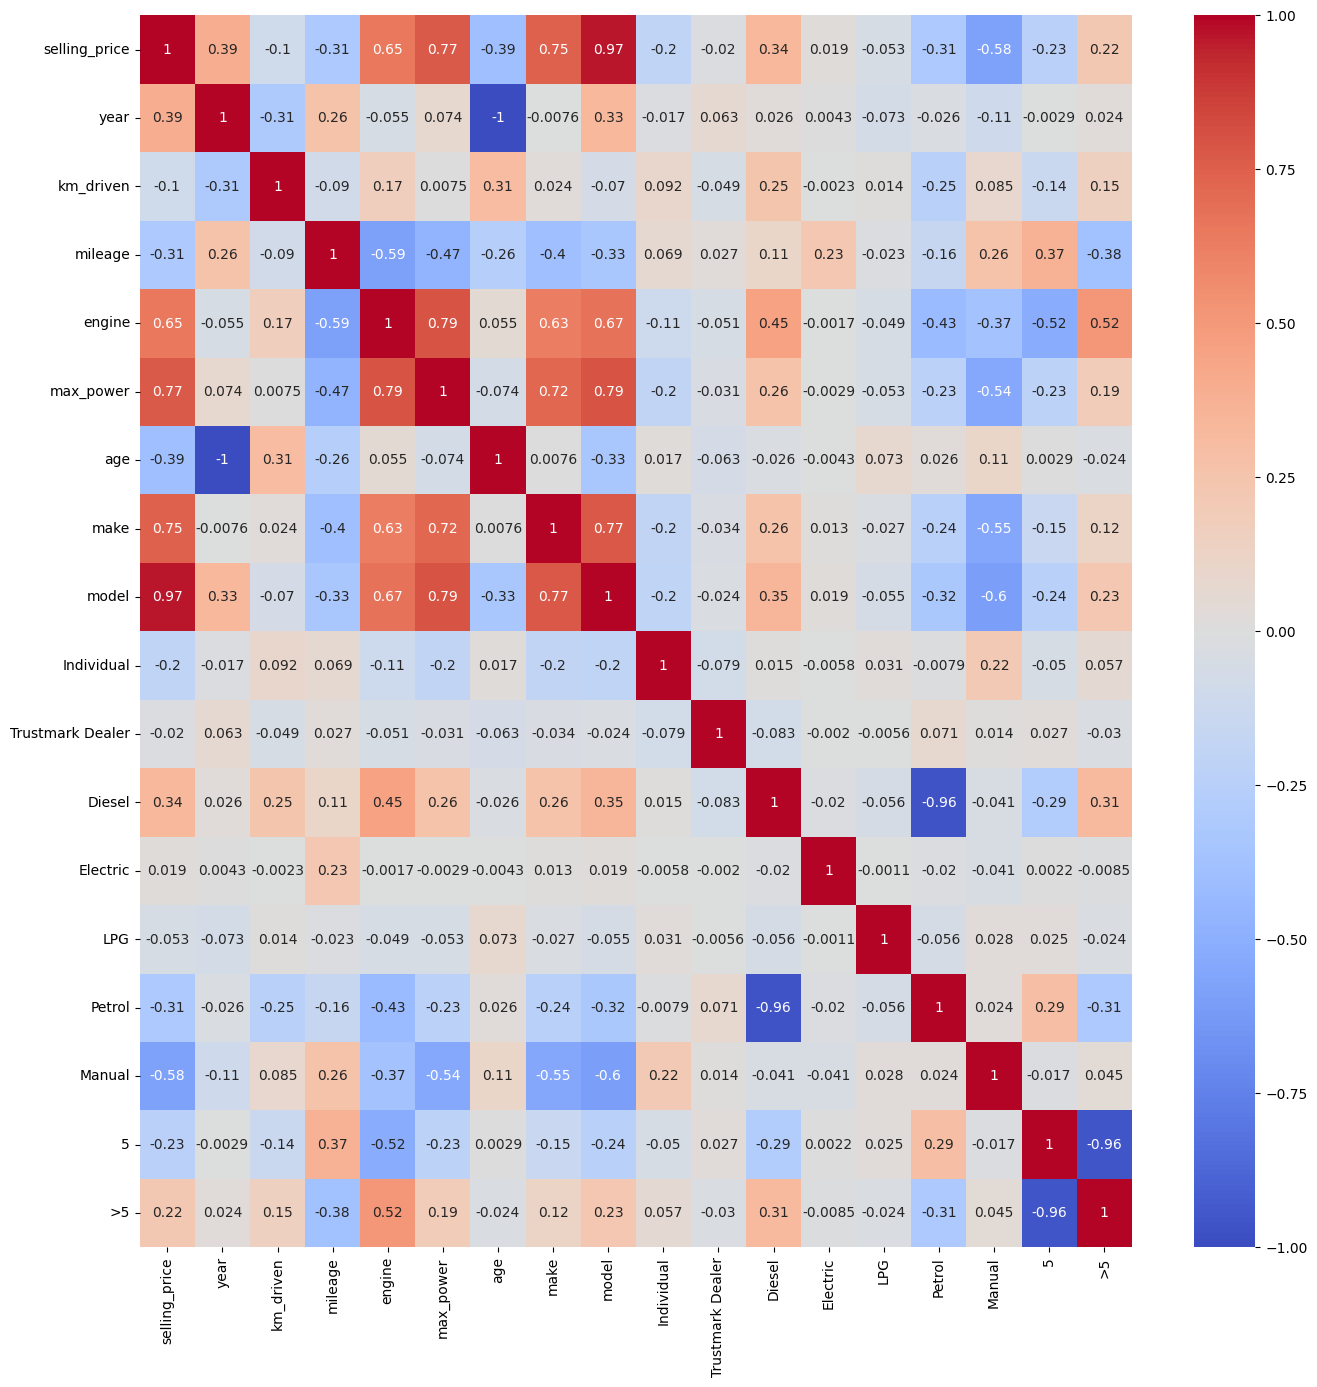

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [10]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_t


,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.486954,0.158764,-0.896858,0.040307,0.404950,0.486954,-0.168188,-0.473490,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,-2.023235,0.448465,-0.428013
1,0.763433,-0.429161,0.231029,-0.922002,-0.692532,-0.763433,-0.524700,-0.592231,1.244173,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
2,0.450836,1.316242,0.476821,-0.439884,-0.209961,-0.450836,-0.608249,-0.455186,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,-2.023235,0.448465,-0.428013
3,1.076029,-0.277293,-0.308795,-0.540164,-0.252291,-1.076029,-0.201672,-0.315315,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
4,-1.112147,-0.190317,-0.759031,0.032593,0.264590,1.112147,-0.311621,-0.711439,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,0.494258,0.448465,-0.428013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15851,1.388626,-0.534804,-1.337905,1.768220,1.106750,-1.388626,1.085036,2.454137,-0.803747,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,0.494258,-2.229827,2.336377
15852,1.076029,-0.730473,0.573300,-0.538236,-0.363688,-1.076029,-0.524700,-0.497558,1.244173,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
15853,0.450836,-0.290815,-0.968069,0.221583,0.516347,-0.450836,-0.311621,0.432089,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
15854,-0.486954,-0.796615,-0.143402,1.000687,1.913264,0.486954,2.961284,2.522708,-0.803747,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,-2.023235,0.448465,-0.428013


In [11]:
vif['Features'] = X_t.columns
vif

,Features
0,year
1,km_driven
2,mileage
3,engine
4,max_power
5,age
6,make
7,model
8,Individual
9,Trustmark Dealer


In [13]:
vif['values'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
# round off to 2 decima
vif['values'] = vif['values'].round(2)
# sort in decreasing order of vif
vif = vif.sort_values(by='values', ascending=False)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,values
0,year,inf
5,age,inf
13,Petrol,18.29
10,Diesel,17.29
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.17
4,max_power,5.03
6,make,3.33


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)

vif['Features'] = X_t.columns
vif['values'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
# round off to 2 decima
vif['values'] = vif['values'].round(2)
# sort in decreasing order of vif
vif = vif.sort_values(by='values', ascending=False)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,values
0,year,inf
5,age,inf
13,Petrol,18.29
10,Diesel,17.29
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.17
4,max_power,5.03
6,make,3.33


### Homework: use while loop to calculate vif and drop features one by one until no more feature with vif >= 5 is left or r2_score for Target(selling_price) goes below 0.85(Note if any of the condition is met break the while loop)

- made question slightly less collinear with inclass topic and more collinear with prod scenario

### Check residual normality

In [21]:
y_train, y_test

(3443     0.215993
 16090    0.179590
 11070    0.196578
 19214    0.286373
 17843    0.143187
            ...   
 1099     0.931926
 18898    0.237835
 11798    0.385876
 6637     0.907657
 2575     0.223274
 Name: selling_price, Length: 15856, dtype: float64,
 11200    0.640699
 9638     0.099502
 16445    0.203859
 14965    0.106783
 3114     0.218420
            ...   
 17900    0.876107
 13319    0.179590
 135      0.107269
 10277    0.446548
 4887     0.174736
 Name: selling_price, Length: 3964, dtype: float64)

In [26]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# non numerical categorical variable handling
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

# scaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.604e+04
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        16:57:47   Log-Likelihood:                 23464.
No. Observations:               15856   AIC:                        -4.689e+04
Df Residuals:                   15838   BIC:                        -4.675e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3050      0.000    696.684      0.0

In [30]:
y_hat = sm_model.predict(X_sm)


In [31]:
errors  = y_train - y_hat


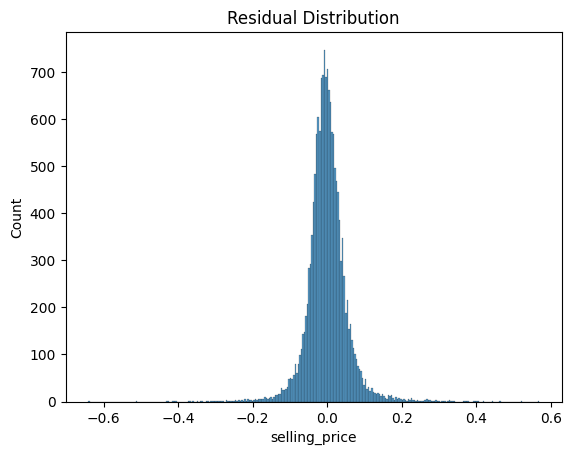

In [32]:
import seaborn as sns

sns.histplot(errors)
plt.title("Residual Distribution")
plt.show()

In [37]:
from scipy import stats

res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(0.8901752804105425)

### Check for Homoscedestacity(No Heteroscedeasticity)

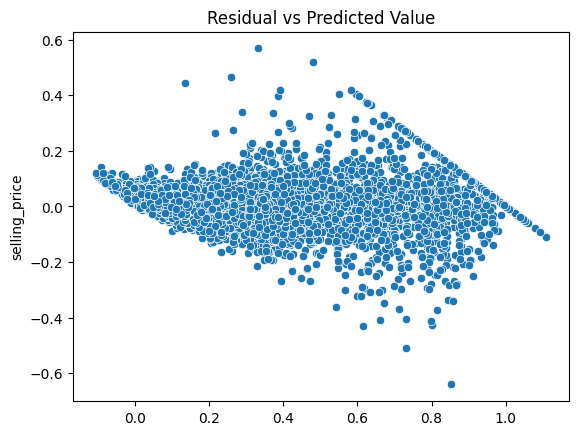

In [38]:
# scatter plot of y_hat vs error
sns.scatterplot(x=y_hat, y=errors)
plt.title("Residual vs Predicted Value")
plt.show()

In [41]:
# perform the goldfeld-quandt test to check for homoscedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)


[('F statistic', np.float64(0.9810622960533176)),
 ('p-value', np.float64(0.8023889833299112))]

Fail to reject null hypothesis. the two group have constant variance